## This is an updated version of the file used in the previous class

**The changes made are as follows:**
1. The K-Means clustering now gets a sample of each of the 10 digits to use as starting centroids rather than random points.
2. The MeanShift clustering gets the same seeds, and also a specified bandwidth. This is to ensure it stops.
3. The average images from the clusters are calculated and displayed


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, DBSCAN
import os

In [3]:
path = r'C:\Users\subra\OneDrive\Desktop\add\train'
os.listdir(path)
traindata = pd.read_csv(path + '/train.csv')
traindata.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The data here has the labels in the first column, and the actual pixels of the digit in the other columns. We will now separate them.

In [4]:
labels = np.asarray(traindata.label) 
digits = np.asarray(traindata)
digits = digits[:,1:]

The labels array contains the labels of the data. The digits array contais the actual data, one digit per row. The digits are 28x28 pixels. Now we will trite a small function to visualize any digit we want.

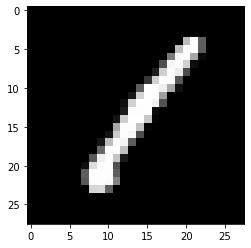

In [5]:
def getDigit(arr):
    pic = np.reshape(arr,[28,28])
    pic = np.uint8(pic)
    return pic

pic = getDigit(digits[0,:])
plt.imshow(pic,'gray')

... and a bunch of them.

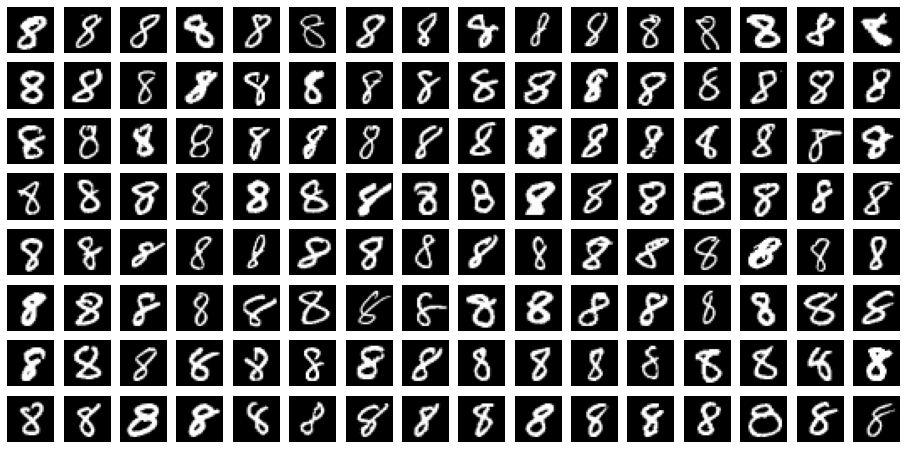

In [6]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
digit_we_need_to_see = 8
for row in range(digits.shape[0]):
    if labels[row]==digit_we_need_to_see:
        count = count + 1
        pic = getDigit(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()


Now, we try to do clustering on this data and see what happens

In [7]:
model = KMeans(10)
model.fit(digits)

KMeans(n_clusters=10)

Now let's visualize a cluster...

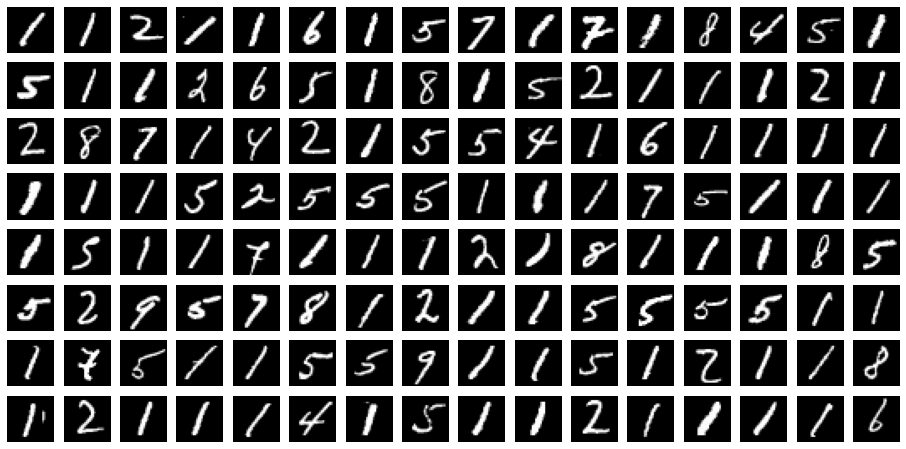

In [9]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
cluster_we_need_to_see = 0

for row in range(digits.shape[0]):
    if model.labels_[row] == cluster_we_need_to_see:
        count = count + 1
        pic = getDigit(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()


Now let's see how this performs with a little help from us. We provide the initial seed values instead of the random cluster centers.

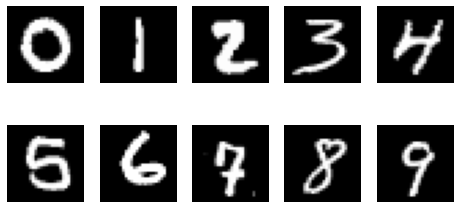

In [10]:
numseeds = []
count = 0
for row in range(digits.shape[0]):
    if labels[row] == count:
        count = count + 1
        numseeds.append(digits[row,:])
        
    if count == 10:
        break

numseeds = np.asarray(numseeds)
fig=plt.figure(figsize=(8, 4))

columns = 5
rows = 2

for row in range(numseeds.shape[0]):
        pic = getDigit(numseeds[row,:])
        fig.add_subplot(rows, columns, row+1)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
plt.show()


In [11]:
model = KMeans(n_clusters = 10, init=numseeds)
model.fit(digits)

<ipython-input-11-03c2857d2677>:2: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  model.fit(digits)


KMeans(init=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
       n_clusters=10)

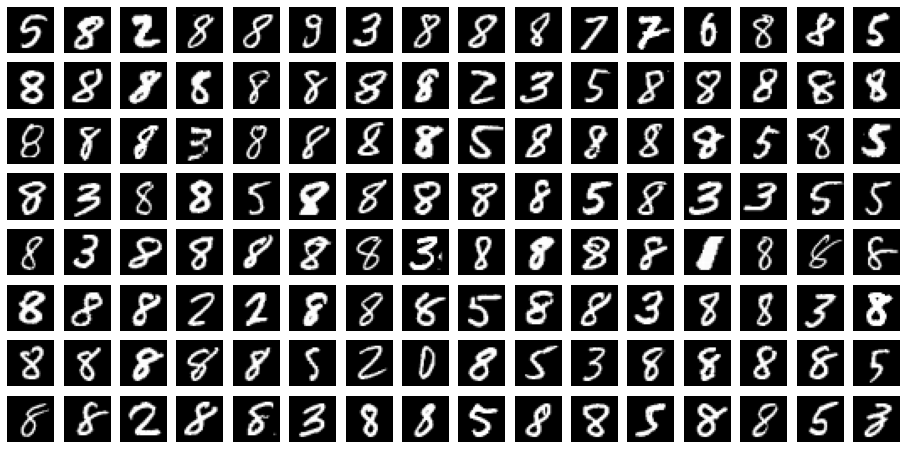

In [12]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
cluster_we_need_to_see = 2

for row in range(digits.shape[0]):
    if model.labels_[row] == cluster_we_need_to_see:
        count = count + 1
        pic = getDigit(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()



5370


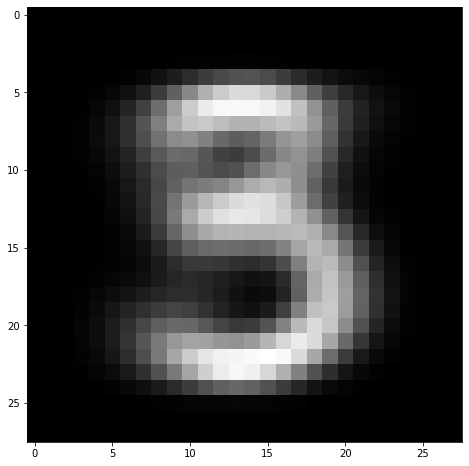

In [13]:
count = 0

fig=plt.figure(figsize=(8, 8))

cluster_we_need_to_see = 5
picsum = np.zeros([28,28])
for row in range(digits.shape[0]):
    if model.labels_[row] == cluster_we_need_to_see:
        count = count + 1
        pic = getDigit(digits[row,:])
        picsum += pic

picsum /= count
print(count)
plt.imshow(picsum,'gray')



Now let's see Meanshift clustering. We are providing a value for bandwidth and the seeds as well, otherwise it just doesn't stop in a reasonable amount of time.

In [14]:
model = MeanShift(bandwidth=0.5, seeds=numseeds, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None)
model.fit(digits)
model.cluster_centers_.shape

(10, 784)

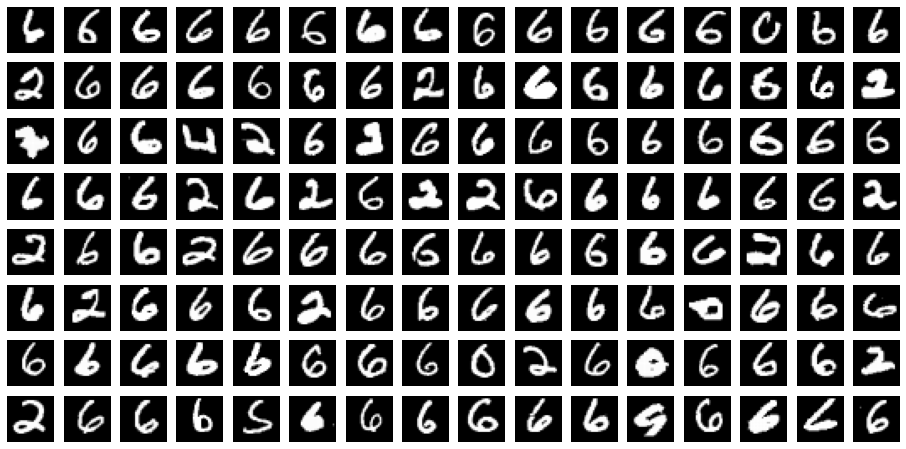

In [15]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
cluster_we_need_to_see = 0

for row in range(digits.shape[0]):
    if model.labels_[row] == cluster_we_need_to_see:
        count = count + 1
        pic = getDigit(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()
